In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [11]:
from perceptron import Perceptron
from scores import Scores
from dados import DadosWines

In [3]:
print("Obtendo dados...")
# Obtendo os dados dos Vinhos a partir da minha classe
vinhos = DadosWines()
vinhos.obter_dados()

# número de dados de treino
n_train = 128

# Divide os dados nos conjuntos de treino e teste
vinhos.split(n_train)
print(vinhos)

Obtendo dados...
Conjunto de Treino:
X.Shape: (128, 13)
Y.Shape: (128, 1)

Conjunto de Teste:
X.Shape: (50, 13)
Y.Shape: (50, 1)



In [4]:
# padronizando nomes
x_train, x_test = vinhos.x_train, vinhos.x_test
y_train, y_test = vinhos.y_train, vinhos.y_test

In [19]:
print("Treinando...")

perceptron = Perceptron(estrategia="mse", ativacao="sigm", mse_max=0.02, debug=True)
perceptron.treinar(x_train, y_train)

print("Estrutura da rede:", perceptron.network.estrutura)
print("Taxa Ótima= %.3f"%(perceptron.taxa))

Treinando...



Acurácia: 0.969 | MSE: 0.027
Taxa=0.100 | Estrutura=[13, 3, 3]




Acurácia: 0.984 | MSE: 0.021
Taxa=0.200 | Estrutura=[13, 4, 3]




Acurácia: 0.984 | MSE: 0.018
Taxa=0.300 | Estrutura=[13, 5, 3]

Estrutura da rede: [13, 5, 3]
Taxa Ótima= 0.300


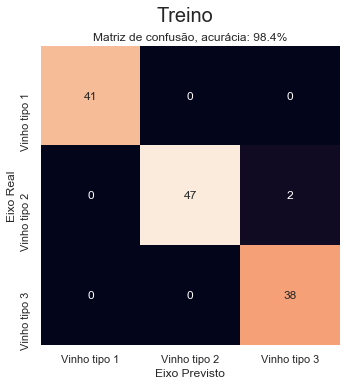

MSE (Treino)= 0.018
L1  (Treino)= 0.195


In [20]:
# Obtendo previsões do conjunto de treino (apenas para debug)
y_train_pred = perceptron.prever(vinhos.x_train)

# minha classe geradora da matriz de confusão
scores_t = Scores(vinhos.y_train, y_train_pred)
scores_t.exibir_grafico("Treino")
print("MSE (Treino)= %.3f"%(perceptron.funcao_erro(x_train, y_train)))
print("L1  (Treino)= %.3f"%(perceptron.funcao_erro(x_train, y_train, norma="l1")))

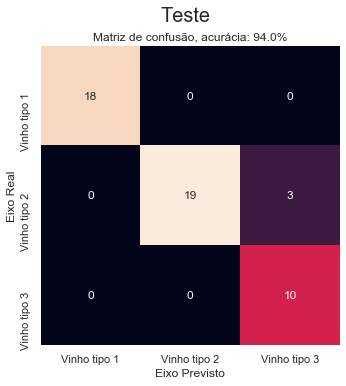

MSE (Teste)= 0.044
L1  (Teste)= 0.293


In [21]:
# Fitando os dados de teste
y_test_pred = perceptron.prever(x_test)

# minha classe geradora da matriz de confusão
scores = Scores(y_test, y_test_pred)
scores.exibir_grafico("Teste")
print("MSE (Teste)= %.3f"%(perceptron.funcao_erro(x_test, y_test)))
print("L1  (Teste)= %.3f"%(perceptron.funcao_erro(x_test, y_test, norma="l1")))